# Lab 04 - Bài tập

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [ ]:
import numpy as np

# a
def simulate_exam():
    correct_answers = np.random.choice([0, 1], size=10, p=[0.75, 0.25])
    return np.sum(correct_answers)

results = [simulate_exam() for _ in range(10)]
print("Số câu đúng trong 10 lần kiểm tra:", results)

# b
def calculate_score(correct_answers):
    return correct_answers * 4 + (10 - correct_answers) * -2

scores = [calculate_score(simulate_exam()) for _ in range(10000)]
probability_of_4_points = np.mean(np.array(scores) == 4)
print("Xác suất để sinh viên này được 4 điểm:", probability_of_4_points)

# c
E_X = 10 * 0.25
Var_X = 10 * 0.25 * 0.75
print("E(X):", E_X)
print("Var(X):", Var_X)

Số câu đúng trong 10 lần kiểm tra: [np.int64(3), np.int64(2), np.int64(3), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(3), np.int64(0), np.int64(1)]
Xác suất để sinh viên này được 4 điểm: 0.1538
E(X): 2.5
Var(X): 1.875


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [ ]:
from scipy.stats import poisson


lambda_ = 3

prob_1_call = poisson.pmf(1, lambda_)
prob_2_calls = poisson.pmf(2, lambda_)
prob_3_calls = poisson.pmf(3, lambda_)

print("Xác suất nhận được 1 cuộc gọi:", prob_1_call)
print("Xác suất nhận được 2 cuộc gọi:", prob_2_calls)
print("Xác suất nhận được 3 cuộc gọi:", prob_3_calls)

Xác suất nhận được 1 cuộc gọi: 0.14936120510359185
Xác suất nhận được 2 cuộc gọi: 0.22404180765538775
Xác suất nhận được 3 cuộc gọi: 0.22404180765538775


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.
b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu
c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu
d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

Tỷ lệ loại 1 (trên 505 gam): 0.10564977366685535
Tỷ lệ loại 2 (từ 495 – 505 gam): 0.7887004526662893
Tỷ lệ loại 3 (dưới 495 gam): 0.10564977366685535


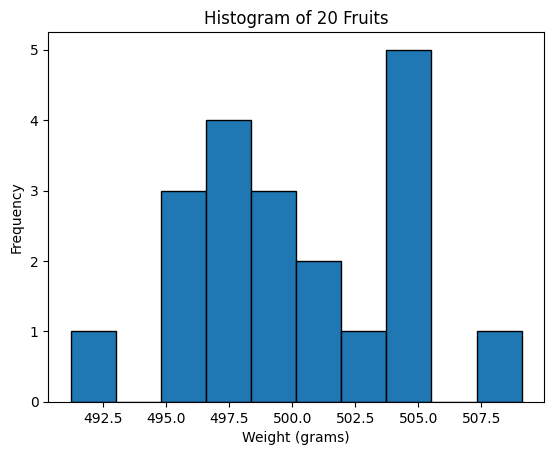

Giá trị trung bình của mẫu 20: 500.07921750467085
Độ lệch chuẩn của mẫu 20: 4.209692050686151


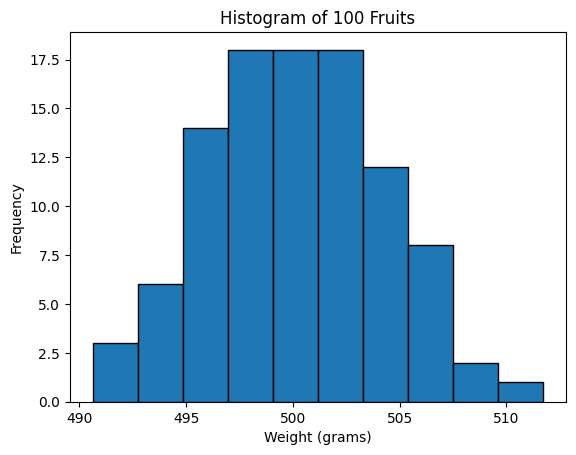

Giá trị trung bình của mẫu 100: 500.19311522153663
Độ lệch chuẩn của mẫu 100: 4.111058604854997


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Thông số phân phối chuẩn
mu = 500
sigma = 4 

# a
prob_type_1 = 1 - norm.cdf(505, mu, sigma)
prob_type_2 = norm.cdf(505, mu, sigma) - norm.cdf(495, mu, sigma)
prob_type_3 = norm.cdf(495, mu, sigma)

print("Tỷ lệ loại 1 (trên 505 gam):", prob_type_1)
print("Tỷ lệ loại 2 (từ 495 – 505 gam):", prob_type_2)
print("Tỷ lệ loại 3 (dưới 495 gam):", prob_type_3)

# b
sample_20 = np.random.normal(mu, sigma, 20)
plt.hist(sample_20, bins=10, edgecolor='black')
plt.title('Histogram of 20 Fruits')
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')
plt.show()

mean_20 = np.mean(sample_20)
std_20 = np.std(sample_20)
print("Giá trị trung bình của mẫu 20:", mean_20)
print("Độ lệch chuẩn của mẫu 20:", std_20)

# c
sample_100 = np.random.normal(mu, sigma, 100)
plt.hist(sample_100, bins=10, edgecolor='black')
plt.title('Histogram of 100 Fruits')
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')
plt.show()

mean_100 = np.mean(sample_100)
std_100 = np.std(sample_100)
print("Giá trị trung bình của mẫu 100:", mean_100)
print("Độ lệch chuẩn của mẫu 100:", std_100)


**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4

c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

In [9]:
import numpy as np

rolls = np.random.randint(1, 7, 5000)

# a
prob_4 = np.mean(rolls == 4)
print("Xác suất để số chấm xuất hiện là 4:", prob_4)

# b
prob_ge_4 = np.mean(rolls >= 4)
print("Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4:", prob_ge_4)

# c
prob_6_given_ge_4 = np.mean(rolls[rolls >= 4] == 6)
print("Xác suất để mặt 6 chấm xuất hiện khi biết số chấm xuất hiện lớn hơn hoặc bằng 4:", prob_6_given_ge_4)

Xác suất để số chấm xuất hiện là 4: 0.1644
Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4: 0.5082
Xác suất để mặt 6 chấm xuất hiện khi biết số chấm xuất hiện lớn hơn hoặc bằng 4: 0.3427784336875246


**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3

b. Vẽ đồ thị boxplot

c. Vẽ các đồ thị: tần số, tần suất

Min: 23
Max: 45
Q1: 33.0
Q2 (Median): 35.0
Q3: 37.0


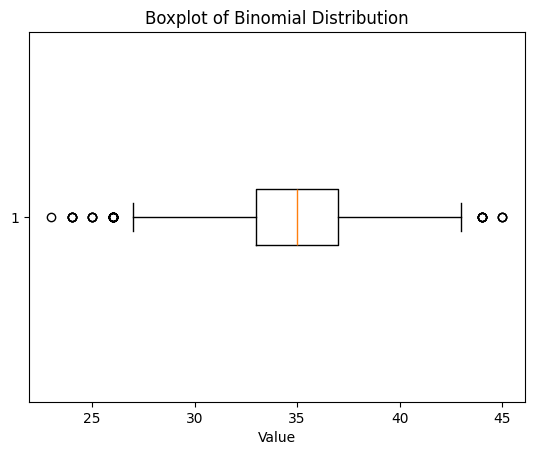

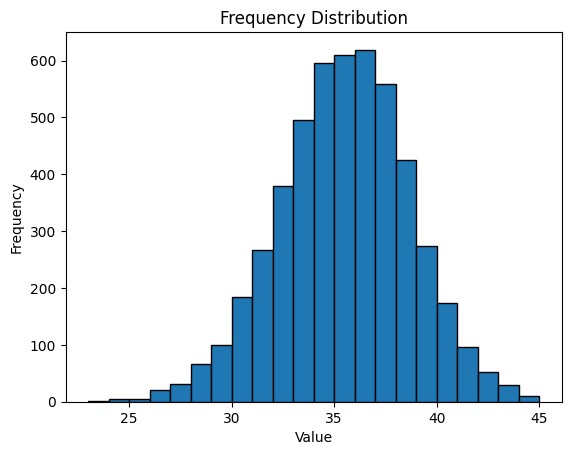

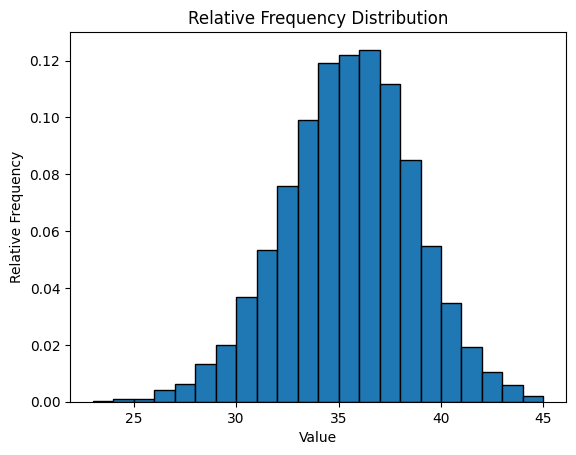

In [7]:
import numpy as np
import matplotlib.pyplot as plt

n = 50
p = 0.7
data = np.random.binomial(n, p, 5000)

# a
min_val = np.min(data)
max_val = np.max(data)
Q1 = np.percentile(data, 25)
Q2 = np.median(data)
Q3 = np.percentile(data, 75)

print("Min:", min_val)
print("Max:", max_val)
print("Q1:", Q1)
print("Q2 (Median):", Q2)
print("Q3:", Q3)

# b
plt.boxplot(data, vert=False)
plt.title('Boxplot of Binomial Distribution')
plt.xlabel('Value')
plt.show()

# c
plt.hist(data, bins=range(min_val, max_val + 1), edgecolor='black', density=False)
plt.title('Frequency Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.hist(data, bins=range(min_val, max_val + 1), edgecolor='black', density=True)
plt.title('Relative Frequency Distribution')
plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.show()


**Bài 6**

Giả sử X là biến ngẫu nhiên rời rạc

a. Hãy cho biết ý nghĩa câu lệnh sau: `binom.pmf(4, 10, 0.6)`

b. Giả sử X có phân phối nhị thức `X ~ B(10, 0.6)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

c. Hãy cho biết ý nghĩa câu lệnh sau: `poisson.pmf(4, 3)`

d. Giả sử X có phân phối Poisson `X ~ P(3)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

In [ ]:
from scipy.stats import binom, poisson

# a
binom_pmf_example = binom.pmf(4, 10, 0.6)
print("Ý nghĩa câu lệnh `binom.pmf(4, 10, 0.6)`: Xác suất để X = 4 với X ~ B(10, 0.6):", binom_pmf_example)

# b
P_X_leq_5 = binom.cdf(5, 10, 0.6)
P_X_geq_4 = 1 - binom.cdf(3, 10, 0.6)
P_X_eq_5 = binom.pmf(5, 10, 0.6)

print("P(X <= 5) với X ~ B(10, 0.6):", P_X_leq_5)
print("P(X >= 4) với X ~ B(10, 0.6):", P_X_geq_4)
print("P(X = 5) với X ~ B(10, 0.6):", P_X_eq_5)

# c
poisson_pmf_example = poisson.pmf(4, 3)
print("Ý nghĩa câu lệnh `poisson.pmf(4, 3)`: Xác suất để X = 4 với X ~ P(3):", poisson_pmf_example)

# d
P_X_leq_5_poisson = poisson.cdf(5, 3)
P_X_geq_4_poisson = 1 - poisson.cdf(3, 3)
P_X_eq_5_poisson = poisson.pmf(5, 3)

print("P(X <= 5) với X ~ P(3):", P_X_leq_5_poisson)
print("P(X >= 4) với X ~ P(3):", P_X_geq_4_poisson)
print("P(X = 5) với X ~ P(3):", P_X_eq_5_poisson)


Ý nghĩa câu lệnh `binom.pmf(4, 10, 0.6)`: Xác suất để X = 4 với X ~ B(10, 0.6): 0.11147673600000006
P(X <= 5) với X ~ B(10, 0.6): 0.36689674240000025
P(X >= 4) với X ~ B(10, 0.6): 0.9452381183999999
P(X = 5) với X ~ B(10, 0.6): 0.2006581248
Ý nghĩa câu lệnh `poisson.pmf(4, 3)`: Xác suất để X = 4 với X ~ P(3): 0.16803135574154085
P(X <= 5) với X ~ P(3): 0.9160820579686966
P(X >= 4) với X ~ P(3): 0.35276811121776874
P(X = 5) với X ~ P(3): 0.10081881344492458


**Bài 7**

a. Cho biết ý nghĩa của các câu lệnh sau:

- `norm.cdf(2)`

- `norm.cdf(2, 1, 1)`

- `norm.cdf(2, 1, 2)`

b. Cho biết kết quả của câu lệnh sau: `norm.ppf(norm.cdf(2))`

c. Tính các giá trị sau và vẽ hình minh họa cho các giá trị tính được:

- `norm.ppf(0.975)`

- `norm.ppf(0.975, 1, 1)`

- `norm.ppf(0.975, 1, 2)`

d. Giả sử biến ngẫu nhiên X có phân phối chuẩn với kỳ vọng là 24 và phương sai là 16. Hãy tính các giá trị sau:

- $P(X \leq 20)$
- $P(X \ge 29.5)$
- $P(X = 23.8)$

norm.cdf(2): 0.9772498680518208
norm.cdf(2, 1, 1): 0.8413447460685429
norm.cdf(2, 1, 2): 0.6914624612740131
norm.ppf(norm.cdf(2)): 2.0000000000000004
norm.ppf(0.975): 1.959963984540054
norm.ppf(0.975, 1, 1): 2.959963984540054
norm.ppf(0.975, 1, 2): 4.919927969080108


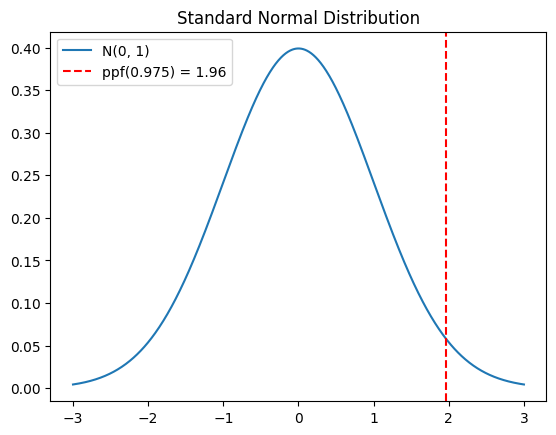

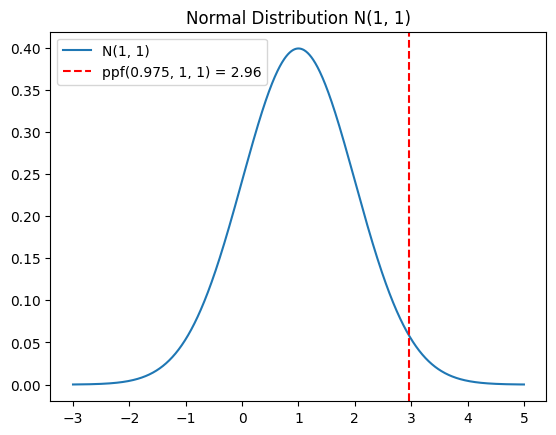

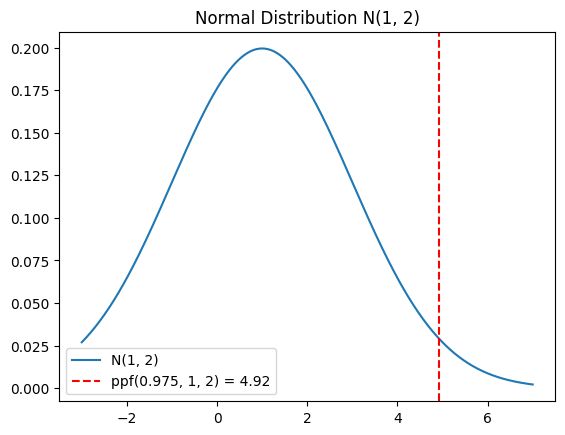

P(X <= 20) với X ~ N(24, 16): 0.15865525393145707
P(X >= 29.5) với X ~ N(24, 16): 0.08456572235133564
P(X = 23.8) với X ~ N(24, 16): 0


In [11]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# a
print("norm.cdf(2):", norm.cdf(2))

print("norm.cdf(2, 1, 1):", norm.cdf(2, 1, 1))

print("norm.cdf(2, 1, 2):", norm.cdf(2, 1, 2))

# b
print("norm.ppf(norm.cdf(2)):", norm.ppf(norm.cdf(2)))

# c
ppf_0975 = norm.ppf(0.975)
ppf_0975_1_1 = norm.ppf(0.975, 1, 1)
ppf_0975_1_2 = norm.ppf(0.975, 1, 2)

print("norm.ppf(0.975):", ppf_0975)
print("norm.ppf(0.975, 1, 1):", ppf_0975_1_1)
print("norm.ppf(0.975, 1, 2):", ppf_0975_1_2)

x = np.linspace(-3, 3, 1000)
y = norm.pdf(x)
plt.plot(x, y, label='N(0, 1)')
plt.axvline(ppf_0975, color='r', linestyle='--', label=f'ppf(0.975) = {ppf_0975:.2f}')
plt.legend()
plt.title('Standard Normal Distribution')
plt.show()

x = np.linspace(-3, 5, 1000)
y = norm.pdf(x, 1, 1)
plt.plot(x, y, label='N(1, 1)')
plt.axvline(ppf_0975_1_1, color='r', linestyle='--', label=f'ppf(0.975, 1, 1) = {ppf_0975_1_1:.2f}')
plt.legend()
plt.title('Normal Distribution N(1, 1)')
plt.show()

x = np.linspace(-3, 7, 1000)
y = norm.pdf(x, 1, 2)
plt.plot(x, y, label='N(1, 2)')
plt.axvline(ppf_0975_1_2, color='r', linestyle='--', label=f'ppf(0.975, 1, 2) = {ppf_0975_1_2:.2f}')
plt.legend()
plt.title('Normal Distribution N(1, 2)')
plt.show()

# d
mu = 24
sigma = 4 

P_X_leq_20 = norm.cdf(20, mu, sigma)
P_X_geq_29_5 = 1 - norm.cdf(29.5, mu, sigma)
P_X_eq_23_8 = 0

print("P(X <= 20) với X ~ N(24, 16):", P_X_leq_20)
print("P(X >= 29.5) với X ~ N(24, 16):", P_X_geq_29_5)
print("P(X = 23.8) với X ~ N(24, 16):", P_X_eq_23_8)


**Bài 8**

Một công ty sản xuất làm ra các chi tiết máy với độ dài các chi tiết có phân phối chuẩn với kỳ vọng là 3000 mm và độ lệch chuẩn là 3 mm. Yêu cầu cho các chi tiết máy này là phải có chiều dài từ 2993 mm đến 3007 mm. Tính tỷ lệ sản phẩm lỗi của công ty

In [12]:
from scipy.stats import norm

mu = 3000
sigma = 3

lower_bound = 2993
upper_bound = 3007

prob_within_bounds = norm.cdf(upper_bound, mu, sigma) - norm.cdf(lower_bound, mu, sigma)
prob_defective = 1 - prob_within_bounds

print("Tỷ lệ sản phẩm lỗi của công ty:", prob_defective)

Tỷ lệ sản phẩm lỗi của công ty: 0.01963065725729063


**Bài 9**

Giả sử điểm thi TOEIC là một biến ngẫu nhiên có phân phối chuẩn với kỳ vọng là 500, độ lệch chuẩn là 8. Bạn hãy:

a. Mô phỏng bằng cách phát sinh ngẫu nhiên điểm thi TOIEC của một nhóm gồm 50 người.

b. Tính điểm trung bình và độ lệch chuẩn về điểm của nhóm.

c. Tìm miền giá trị, và miền phân vị (IQR) của nhóm

d. Cho biết tỷ lệ đạt trên 450 điểm của nhóm. 

e. Vẽ đồ thị histogram của nhóm và so sánh với đồ thị hàm mật độ của phân phối chuẩn với kỳ vọng là 500 và độ lệch chuẩn là 8.

f. Thay vì mô phỏng 50 người, hãy mô phỏng nhóm với 100 người thi. Bạn có nhận xét gì?

Điểm trung bình của nhóm 50 người: 500.70055380882013
Độ lệch chuẩn của nhóm 50 người: 7.72225056508632
Miền giá trị của nhóm 50 người: [ 480.5954626944086 , 519.6302296106888 ]
Miền phân vị (IQR) của nhóm 50 người: 9.051984153383273
Tỷ lệ đạt trên 450 điểm của nhóm 50 người: 1.0


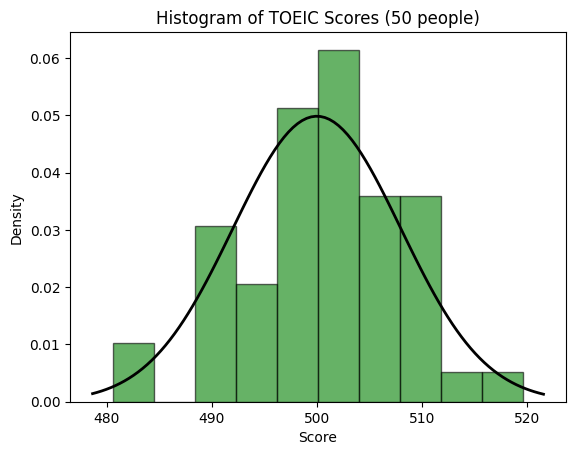

Điểm trung bình của nhóm 100 người: 499.37452185827823
Độ lệch chuẩn của nhóm 100 người: 7.72503165744637


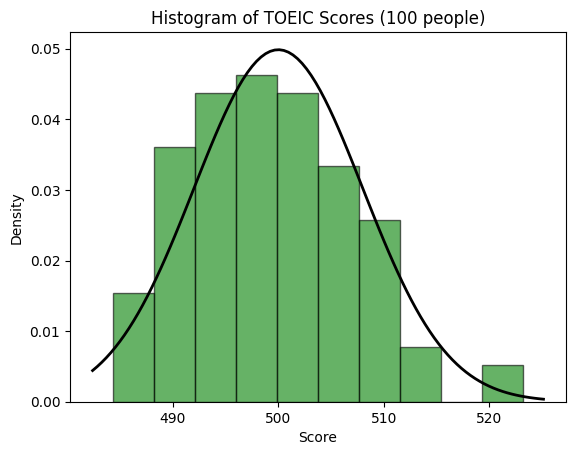

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# a
mu = 500
sigma = 8
group_50 = np.random.normal(mu, sigma, 50)

# b
mean_50 = np.mean(group_50)
std_50 = np.std(group_50)
print("Điểm trung bình của nhóm 50 người:", mean_50)
print("Độ lệch chuẩn của nhóm 50 người:", std_50)

# c
min_val_50 = np.min(group_50)
max_val_50 = np.max(group_50)
Q1_50 = np.percentile(group_50, 25)
Q3_50 = np.percentile(group_50, 75)
IQR_50 = Q3_50 - Q1_50

print("Miền giá trị của nhóm 50 người: [", min_val_50, ",", max_val_50, "]")
print("Miền phân vị (IQR) của nhóm 50 người:", IQR_50)

# d
prob_above_450_50 = np.mean(group_50 > 450)
print("Tỷ lệ đạt trên 450 điểm của nhóm 50 người:", prob_above_450_50)

# e
plt.hist(group_50, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of TOEIC Scores (50 people)')
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()

# f
group_100 = np.random.normal(mu, sigma, 100)

mean_100 = np.mean(group_100)
std_100 = np.std(group_100)
print("Điểm trung bình của nhóm 100 người:", mean_100)
print("Độ lệch chuẩn của nhóm 100 người:", std_100)

plt.hist(group_100, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of TOEIC Scores (100 people)')
plt.xlabel('Score')
plt.ylabel('Density')
plt.show()


**Bài 10**

Viết một chương trình để mô phỏng việc tung đồng xu và đánh giá phương sai của giá trị mô phỏng của biến ngẫu nhiên X (tung được mặt `Head`) đối với các số lần tung khác nhau. Giả sử  đồng xu phải cân bằng. 

Đối với mỗi N từ 10; 40; 90; 160; 250; 490; 640; 810; 1000, hãy ước tính giá trị của X bằng cách mô phỏng số lần tung đó. 

Bạn nên chạy mỗi mô phỏng 100 lần và sử dụng tập hợp các ước tính để đánh giá phương sai của ước tính x của bạn. Vẽ biểu đồ phương sai này so với N, bạn có nhận xét gì không?

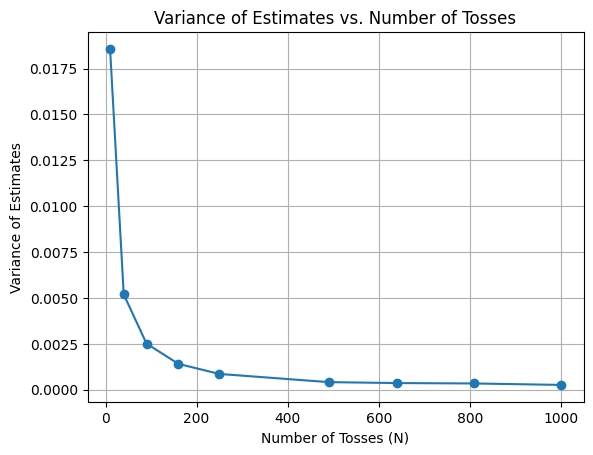

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N_values = [10, 40, 90, 160, 250, 490, 640, 810, 1000]
variances = []

for N in N_values:
    estimates = []
    for _ in range(100):
        tosses = np.random.choice([0, 1], size=N, p=[0.5, 0.5])
        estimate = np.mean(tosses)
        estimates.append(estimate)
    variance = np.var(estimates)
    variances.append(variance)

plt.plot(N_values, variances, marker='o')
plt.xlabel('Number of Tosses (N)')
plt.ylabel('Variance of Estimates')
plt.title('Variance of Estimates vs. Number of Tosses')
plt.grid(True)
plt.show()

---